# About
Morphological transformations are operations applied on binary or grayscale images. They help to:
* Remove noise
* Shrink
* Separate an object
* Identify an object
* Increase an object size
* Increase Background space

Image Morphology is helpful to identify process text, documents, and shapes like lines and boxes.

# Libraries

In [1]:
using Images, TestImages, ImageMorphology

# User-Defined Functions

In [2]:
function load_local_or_test(local_train, image_path)
    """
    The input defines if this function will load a local image or one from TestImages library
    
    Input:
    * local_train: If it contains a value "l", the function will load a local image.
    * image_path: Path for image location, or name of test image
    """
    
    # Loading local or test image
    if local_train == "l"
        img = load(image_path);
    else 
        img = testimage(image_path)
    end
end

load_local_or_test (generic function with 1 method)

In [3]:
function mosaic_output_1d(img_left, img_right, mosaic)
    """    
    Input:
    * img_left
    * img_right
    * mosaic: Boolean parameter defining if this function will return either a mosaic of two images side by side or a single image
    
    """
    
    if mosaic
        return mosaicview(img_left, img_right; nrow = 1)
    else 
        return img_right
    end
end

mosaic_output_1d (generic function with 1 method)

# Images

# Image binarization
Binary images are represented only by either 1 (white) or 0 (black). They can be obtained by a simple threshold at 0.5. They are distorted by noise or texture.

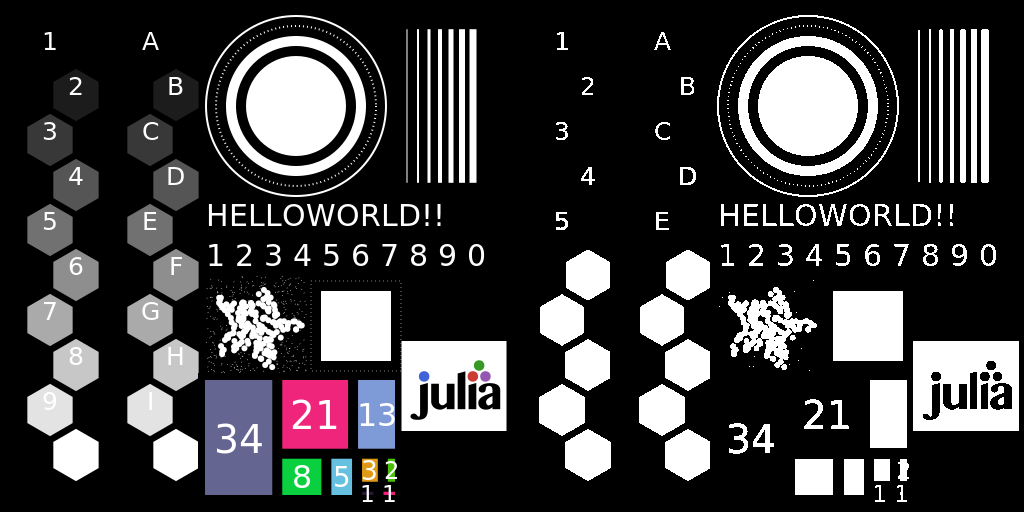

In [4]:
# load an image and first convert to grayscale and then binarize
function binarize_image(local_train, image_path, binary_threshold = 0.5, mosaic = true)
    
    img = load_local_or_test(local_train, image_path)
    
    # All values above the binarization threshold returns values to 1
    img_binary = Gray.(Gray.(img) .> binary_threshold)
    
    return mosaic_output_1d(img, img_binary, mosaic)
    
end


binarize_image("t", "morphology_test_512", 0.5, true)

# Image Erosion
it is one of two base mathematicaal morphology operators. It is a process for shrinking and smoothing an image, removing small objects. 

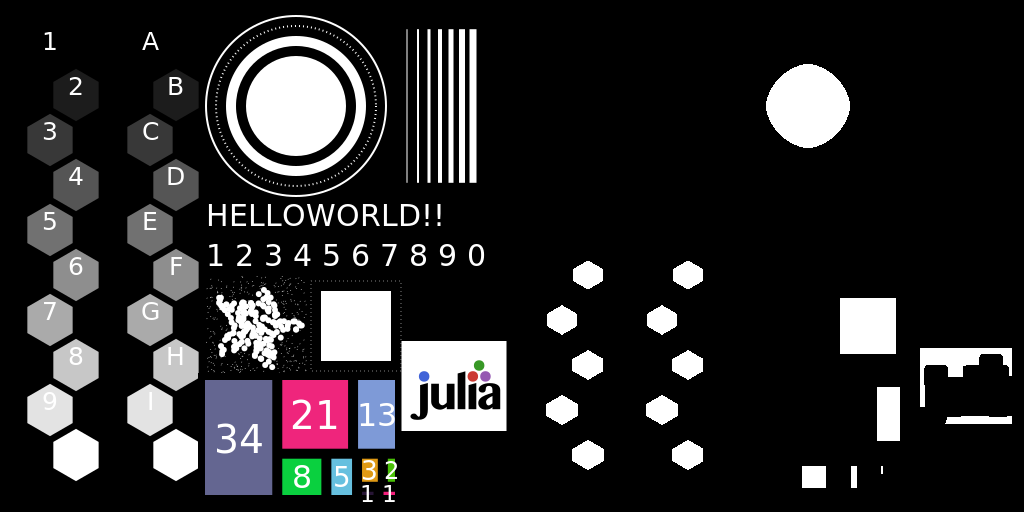

In [50]:
function erode_image(local_train, image_path, num_erosions, binary_threshold, mosaic = true)
    
    # Loading local or test image
    img = load_local_or_test(local_train, image_path)
    
    binarized_img = binarize_image(local_train, image_path, binary_threshold, false)
    
    eroded_img = erode(binarized_img)
    
    if num_erosions > 1
        for i in 2:num_erosions 
            eroded_img = erode(erode(eroded_img))
        end
    end
        
    return mosaic_output_1d(img, eroded_img, mosaic)
    
end

image_path = "morphology_test_512"
erode_image("t", image_path, 4, 0.5, true)

# After 3 erosions all the noise dissapeared.